# *IPython notebook* problems

Import `matplotlib.pylab`, `numpy`, `sympy` and `math`:

In [1]:
import matplotlib.pylab as plb
import numpy as np
import sympy as sym
import math

Add a line to configure `matplotlib` to show figures embedded in the notebook, instead of opening a new window for each figure.

In [2]:
%matplotlib inline

Add a line to get nice-looking $\LaTeX$ formatted output run:

In [3]:
sym.init_printing()

## Exponential Taylor Series

We know that:

$$ e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} $$

**Problem 1)** Consider $f(x) = \sum_{n=0}^{m} \frac{x^n}{n!}$ and plot $[e^x-f(x)]$ as a function of $x$ for $-10 \geq x \geq 10$ and $m =$ 4, 5, 6, and 50. Do all these plots in a single graph. *Hint:* the function factorial in iPython can be evaluated by `math.factorial(n)`. The function exponential can be evaluated by `numpy.exp(x)`.

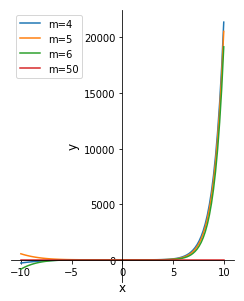

In [4]:
def f(x, n):
    y = 0
    while n >= 0:
        y = y + x**n/math.factorial(n)
        n -= 1
    return np.exp(x) - y
x = np.linspace(-10, 10, 100)
fig, ax = plb.subplots(figsize=(4, 5))
ax.plot(x, f(x, 4), label='m=4')
ax.plot(x, f(x, 5), label='m=5')
ax.plot(x, f(x, 6), label='m=6')
ax.plot(x, f(x, 50), label='m=50')
ax.legend(loc=0)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

## Particle in a 1D box

Let's consider the following potential $V(x)$:

<img src="http://chemwiki.ucdavis.edu/@api/deki/files/9037/ParticleInABox.GIF" alt="coords" height="193" width="295"/>

It can be shown that the solution of the Schrodinger Equation is:

$$\psi_n(x) = A sin(\frac{n\pi}{L}x)$$

**Problem 1.1)** Implement this wavefunction in Sympy and solve the normalization integral in order the get a value for $N$.

$\psi_n(x) = $

In [5]:
x = sym.var('x', real=True)
A = sym.var('A', positive=True)
L = sym.var('L', positive=True)
n = sym.var('n', integer=True, nonzero=True)
f = A*sym.sin((n*sym.pi/L)*x)
f

$ \int_0^L |\psi_n(x)|^2 dx = $

In [6]:
sym.integrate(f**2, (x, 0, L))

By making $ \int_0^L |\psi_n(x)|^2 dx = 1$, what is the value of $N$?

In [7]:
sym.solve(sym.integrate(f**2, (x, 0, L))-1, A)

**Problem 1.2)** Use `matplotlib.pylab` to plot $\sqrt{L}\psi_n(x)$ as a function of $x/L$ for at least three values of $n$.

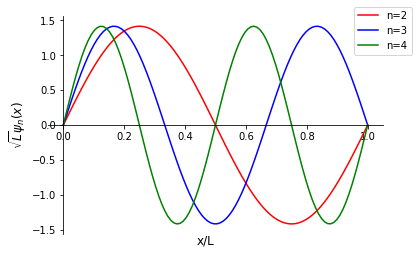

In [8]:
a = np.linspace(0.0, 1.0, 100)
fig, ax = plb.subplots()
ax.plot(a, np.sqrt(2)*np.sin(2*math.pi*a), 'r', label='n=2')
ax.plot(a, np.sqrt(2)*np.sin(3*math.pi*a), 'b', label='n=3')
ax.plot(a, math.sqrt(2)*np.sin(4*math.pi*a), 'g', label='n=4')
ax.legend(bbox_to_anchor=(0.9, 0.8))
ax.set_xlabel('x/L', fontsize=12)
ax.xaxis.set_label_coords(0.47, 0)
ax.set_ylabel('$\sqrt{L}\psi_n(x)$', fontsize=12)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

**Problem 1.3)** Use the `quad` function from `scipy.integrate` to perform numerical integrals in order to check if the expression for $\psi_n(x)$ is normalized for $L = 1$ and the values of $n$ you plotted.

In [9]:
from scipy.integrate import quad
x_lower = 0
x_upper = 1
def f(x):
    return (np.sqrt(2)*np.sin(2*np.pi*x))**2
val, abserr = quad(f, 0, 1)
print(val, abserr)

1.0 7.339840657688866e-10


**Problem 1.4)** Use `sympy` to check that $ \int_0^L \psi_n(x)\psi_m(x) dx = \delta_{n,m}$.

In [10]:
x = sym.var('x', real=True)
L = sym.var('L', real=True)
n = sym.var('n', integer=True, positive=True)
m = sym.var('m', integer=True, positive=True)
f = (sym.sqrt(2)/sym.sqrt(L))*sym.sin((n*sym.pi/L)*x)
g = (sym.sqrt(2)/sym.sqrt(L))*sym.sin((m*sym.pi/L)*x)
check = sym.integrate(f*g, (x, 0, L))
check

⎧0  for m ≠ n
⎨            
⎩1  otherwise

## Waves

Consider the following wave:


$ u_{\pm}(x,t) = A sin[2\pi(\frac{x}{\lambda} \pm \frac{t}{\tau})] $

**Problem 2.1)** Plot a) $u_{+}(x,t)/A$, b) $u_{-}(x,t)/A$ and c) $[u_{+}(x,t) + u_{-}(x,t)]/A$ as a function of $t/\tau$ for a given value of $x/\lambda$. On your plot make $-2 \geq t/\tau \geq 2$.

Enter a value for t/τ: 3


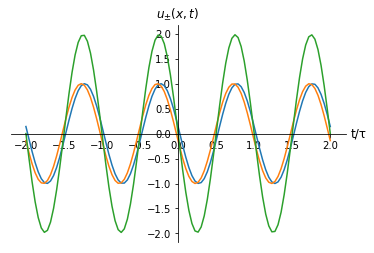

In [13]:
x = np.linspace(-2, 2, 100)

a = float(input('Enter a value for t/\u03c4: '))
fig, ax = plb.subplots()
ax.plot(x, np.sin(2*math.pi*x + a))
ax.plot(x, np.sin(2*math.pi*x - a))
ax.plot(x, np.sin(2*math.pi*x + a)+np.sin(2*math.pi*x - a))
ax.set_xlabel('t/\u03c4', fontsize=12)
ax.xaxis.set_label_coords(1.04, 0.53)
ax.set_ylabel('$u_{\pm}(x, t)$', fontsize=12, rotation=0)
ax.yaxis.set_label_coords(0.5, 1.01)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

**Problem 2.2)** Plot a) $u_{+}(x,t)/A$, b) $u_{-}(x,t)/A$ and c) $[u_{+}(x,t) + u_{-}(x,t)]/A$ as a function of $x/\lambda$ for a given value of $t/\tau$. On your plot make $-2 \geq x/\lambda \geq 2$.

Enter a value for x/λ: 4


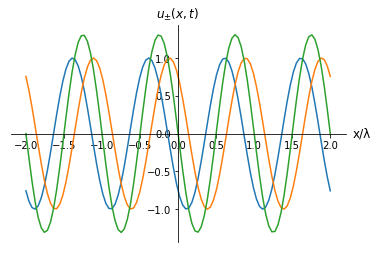

In [14]:
t = np.linspace(-2, 2, 100)
a = float(input('Enter a value for x/\u03bb: '))
fig, ax = plb.subplots()
ax.plot(t, np.sin(2*math.pi*t + a))
ax.plot(t, np.sin(2*math.pi*t - a))
ax.plot(t, np.sin(2*math.pi*t + a)+np.sin(2*math.pi*t - a))
ax.set_xlabel('x/\u03bb', fontsize=12)
ax.xaxis.set_label_coords(1.05, 0.53)
ax.set_ylabel('$u_{\pm}(x, t)$', fontsize=12, rotation=0)
ax.yaxis.set_label_coords(0.5, 1.01)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')